### DATA CLEANING 


In [396]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the dataset and getting information

In [397]:
df = pd.read_csv('diabetes.csv')
df

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50.00,4.70,46.00,4.90,4.20,0.90,2.40,1.40,0.50,24.00,N
1,735,34221,M,26.00,4.50,62.00,4.90,3.70,1.40,1.10,2.10,0.60,23.00,N
2,420,47975,F,50.00,4.70,46.00,4.90,4.20,0.90,2.40,1.40,0.50,24.00,N
3,680,87656,F,50.00,4.70,46.00,4.90,4.20,0.90,2.40,1.40,0.50,24.00,N
4,504,34223,M,33.00,7.10,46.00,4.90,4.90,1.00,0.80,2.00,0.40,21.00,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004,191,454316,M,55.00,NaN,62.00,6.80,5.30,2.00,1.00,3.50,0.90,30.10,Y
1005,192,454316,M,55.00,4.80,88.00,NaN,5.70,4.00,0.90,3.30,1.80,30.00,Y
1006,193,454316,M,62.00,6.30,82.00,6.70,5.30,2.00,1.00,3.50,NaN,30.10,Y
1007,194,454316,F,57.00,4.10,70.00,9.30,5.30,3.30,1.00,1.40,1.30,29.00,Y


In [398]:
#checking the dataset shape
df.shape
print(f'the data has {df.shape[0]} rows and {df.shape[1]} columns')

the data has 1009 rows and 14 columns


In [399]:
#checking the dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1009 non-null   int64  
 1   No_Pation  1009 non-null   int64  
 2   Gender     1009 non-null   object 
 3   AGE        1008 non-null   float64
 4   Urea       1008 non-null   float64
 5   Cr         1007 non-null   float64
 6   HbA1c      1006 non-null   float64
 7   Chol       1007 non-null   float64
 8   TG         1007 non-null   float64
 9   HDL        1008 non-null   float64
 10  LDL        1007 non-null   float64
 11  VLDL       1008 non-null   float64
 12  BMI        1009 non-null   float64
 13  CLASS      1009 non-null   object 
dtypes: float64(10), int64(2), object(2)
memory usage: 110.5+ KB


In [400]:
print('Columns with NA',df.columns[df.isna().any()])
df.isna().sum()

Columns with NA Index(['AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL', 'VLDL'], dtype='object')


,0
ID,0
No_Pation,0
Gender,0
AGE,1
Urea,1
Cr,2
HbA1c,3
Chol,2
TG,2
HDL,1


In [401]:
# checking info 2
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Columns: 14 entries, ID to CLASS
dtypes: float64(10), int64(2), object(2)
memory usage: 110.5+ KB


In [402]:
pd.set_option('display.float_format','{:.2f}'.format)

In [403]:
#Concice summary info
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,1009.00,339.16,239.74,1.00,127.00,296.00,548.00,800.00
No_Pation,1009.00,271744.78,3365681.35,123.00,24065.00,34399.00,45390.00,75435657.00
AGE,1008.00,53.62,8.74,25.00,51.00,55.00,59.00,79.00
Urea,1008.00,5.13,2.93,0.50,3.70,4.60,5.70,38.90
Cr,1007.00,68.97,59.81,6.00,48.00,60.00,73.00,800.00
HbA1c,1006.00,8.28,2.53,0.90,6.50,8.00,10.20,16.00
Chol,1007.00,4.86,1.30,0.00,4.00,4.80,5.60,10.30
TG,1007.00,2.35,1.40,0.30,1.50,2.00,2.90,13.80
HDL,1008.00,1.20,0.66,0.20,0.90,1.10,1.30,9.90
LDL,1007.00,2.61,1.12,0.30,1.80,2.50,3.30,9.90


In [404]:
### Describe Categorical Features
df.describe(include='O')

,Gender,CLASS
count,1009,1009
unique,3,5
top,M,Y
freq,570,840


In [405]:
# Create  adataframe copy to be used in data clesning
df1 = df.copy()
df1

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50.00,4.70,46.00,4.90,4.20,0.90,2.40,1.40,0.50,24.00,N
1,735,34221,M,26.00,4.50,62.00,4.90,3.70,1.40,1.10,2.10,0.60,23.00,N
2,420,47975,F,50.00,4.70,46.00,4.90,4.20,0.90,2.40,1.40,0.50,24.00,N
3,680,87656,F,50.00,4.70,46.00,4.90,4.20,0.90,2.40,1.40,0.50,24.00,N
4,504,34223,M,33.00,7.10,46.00,4.90,4.90,1.00,0.80,2.00,0.40,21.00,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004,191,454316,M,55.00,NaN,62.00,6.80,5.30,2.00,1.00,3.50,0.90,30.10,Y
1005,192,454316,M,55.00,4.80,88.00,NaN,5.70,4.00,0.90,3.30,1.80,30.00,Y
1006,193,454316,M,62.00,6.30,82.00,6.70,5.30,2.00,1.00,3.50,NaN,30.10,Y
1007,194,454316,F,57.00,4.10,70.00,9.30,5.30,3.30,1.00,1.40,1.30,29.00,Y


In [406]:
#check for unique values in each column:
for col in df1.columns:
  print(f'unique values in {col}:"\n" {df1[col].unique()}')


unique values in ID:"
" [502 735 420 680 504 634 721 421 670 759 636 788  82 132 402 566 596 676
 729 742  64  97 126 390 458 470 494 564 696 106 138 315 650 678 699 703
 708 719 740 741 746 794 219 255 450 626 664 704 799 210 237 318 620 640
 668 701 174 276 345 482 630 789 348   7   9  10  42  47  71  72  83  88
  89  96  98  99 102 134 137 139 141 143 144 145 147 149 150 153 154 157
 161 165 166 171 180 181 182 186 190 197 435 472  85 710 429 702   4 189
 201 285 393 468 492 496 498 684 700 716 366 399 490 500 672 690 718 264
 464 466 686 688  16 705 709  19 123 476 682 706 754  68 342 712 715  12
  20  41  60  79  81 133 135 146 152 178  18  24 675  39 474 648  48 656
  57 658  69 662 714  87 231 505 654  61 127 228 674 744  58 108 198 357
 588 666 698 753 110 113 119 122 452 652 660 673 162 168 580 694 790 140
 375 426 453 534 612 692 717 725 777  67 109 351 552 685 750  31 129 173
 176 179 183 185 195 316 646 187 188 191 194 200 203 411 520 622 758 206
 600  76  86 209 212 215 21

In [407]:
df['Gender'].unique()

array(['F', 'M', 'f'], dtype=object)

In [408]:
for column in df1:
  print(column)

ID
No_Pation
Gender
AGE
Urea
Cr
HbA1c
Chol
TG
HDL
LDL
VLDL
BMI
CLASS


### DATA CLEANING
### 2.1 Checking columns and dealing with mispelled columns

In [409]:
df1.columns

Index(['ID', 'No_Pation', 'Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG',
       'HDL', 'LDL', 'VLDL', 'BMI', 'CLASS'],
      dtype='object')

In [410]:
#changing the No_Pation columns
df1.rename(columns={'No_Pation':'Patient_No'},inplace=True)
df1

,ID,Patient_No,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50.00,4.70,46.00,4.90,4.20,0.90,2.40,1.40,0.50,24.00,N
1,735,34221,M,26.00,4.50,62.00,4.90,3.70,1.40,1.10,2.10,0.60,23.00,N
2,420,47975,F,50.00,4.70,46.00,4.90,4.20,0.90,2.40,1.40,0.50,24.00,N
3,680,87656,F,50.00,4.70,46.00,4.90,4.20,0.90,2.40,1.40,0.50,24.00,N
4,504,34223,M,33.00,7.10,46.00,4.90,4.90,1.00,0.80,2.00,0.40,21.00,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004,191,454316,M,55.00,NaN,62.00,6.80,5.30,2.00,1.00,3.50,0.90,30.10,Y
1005,192,454316,M,55.00,4.80,88.00,NaN,5.70,4.00,0.90,3.30,1.80,30.00,Y
1006,193,454316,M,62.00,6.30,82.00,6.70,5.30,2.00,1.00,3.50,NaN,30.10,Y
1007,194,454316,F,57.00,4.10,70.00,9.30,5.30,3.30,1.00,1.40,1.30,29.00,Y


In [411]:
#change columns to lowercase for uniformity and  remove whitepsace if any
df1.columns.str.lower()

Index(['id', 'patient_no', 'gender', 'age', 'urea', 'cr', 'hba1c', 'chol',
       'tg', 'hdl', 'ldl', 'vldl', 'bmi', 'class'],
      dtype='object')

In [412]:
df1.columns.str.replace(' ','')

Index(['ID', 'Patient_No', 'Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol',
       'TG', 'HDL', 'LDL', 'VLDL', 'BMI', 'CLASS'],
      dtype='object')

In [413]:
#combine the above to one code
df1.columns = df1.columns.str.lower().str.replace(' ','')
df1.columns

Index(['id', 'patient_no', 'gender', 'age', 'urea', 'cr', 'hba1c', 'chol',
       'tg', 'hdl', 'ldl', 'vldl', 'bmi', 'class'],
      dtype='object')

In [414]:
#drop unnnecessary columns
del df1['id']

In [415]:
df1

,patient_no,gender,age,urea,cr,hba1c,chol,tg,hdl,ldl,vldl,bmi,class
0,17975,F,50.00,4.70,46.00,4.90,4.20,0.90,2.40,1.40,0.50,24.00,N
1,34221,M,26.00,4.50,62.00,4.90,3.70,1.40,1.10,2.10,0.60,23.00,N
2,47975,F,50.00,4.70,46.00,4.90,4.20,0.90,2.40,1.40,0.50,24.00,N
3,87656,F,50.00,4.70,46.00,4.90,4.20,0.90,2.40,1.40,0.50,24.00,N
4,34223,M,33.00,7.10,46.00,4.90,4.90,1.00,0.80,2.00,0.40,21.00,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004,454316,M,55.00,NaN,62.00,6.80,5.30,2.00,1.00,3.50,0.90,30.10,Y
1005,454316,M,55.00,4.80,88.00,NaN,5.70,4.00,0.90,3.30,1.80,30.00,Y
1006,454316,M,62.00,6.30,82.00,6.70,5.30,2.00,1.00,3.50,NaN,30.10,Y
1007,454316,F,57.00,4.10,70.00,9.30,5.30,3.30,1.00,1.40,1.30,29.00,Y


 ### 2.2 Checking missing values and dealing with them

In [416]:
#Checking the missing values
df1.isnull().sum()

,0
patient_no,0
gender,0
age,1
urea,1
cr,2
hba1c,3
chol,2
tg,2
hdl,1
ldl,2


In [417]:
# a)input with median
hbaic_median = df1['hba1c'].median()
df1['hba1c'].fillna(hbaic_median,inplace=True)

In [418]:
df1.isna().sum()

,0
patient_no,0
gender,0
age,1
urea,1
cr,2
hba1c,0
chol,2
tg,2
hdl,1
ldl,2


In [419]:
#impute using mode
gender_mode = df1.gender.mode()[0]
df1.gender.fillna(gender_mode,inplace=True) ## use bfill for backword fill, and ffill for forward fill

In [420]:
#Fill missing values with specific values eg 0
df1['hba1c'].fillna(0,inplace=True)

In [421]:
#Fill the missing values in the categorical column with specific values
df1['gender'].fillna('unkwown',inplace=True)

In [422]:
#dropping the missing values# we drop when we just have few missing values
df1.dropna(inplace=True)

In [423]:
df1.isna().sum()

,0
patient_no,0
gender,0
age,0
urea,0
cr,0
hba1c,0
chol,0
tg,0
hdl,0
ldl,0


In [424]:
df1['class'].value_counts()

,count
class,
Y,832
N,102
P,53
Y,9
N,1


In [425]:
df1.groupby('class')['class'].count()

,class
class,
N,102
N,1
P,53
Y,832
Y,9


In [426]:
df1['class'] = df1['class'].str.strip()
df1['class'].unique()

array(['N', 'P', 'Y'], dtype=object)

In [427]:
df1['gender'].unique()

array(['F', 'M', 'f'], dtype=object)

In [428]:
df1['gender'].value_counts()

,count
gender,
M,563
F,432
f,2


In [429]:
df1['gender'].str.replace('f','F').value_counts()

,count
gender,
M,563
F,434


In [430]:
df1['gender'] = df1['gender'].str.replace('f','F')
df1['gender'].unique()

array(['F', 'M'], dtype=object)

### 2.3 Checking for duplicates

In [431]:
### Checking for duplicates
df1[df1.duplicated()]

,patient_no,gender,age,urea,cr,hba1c,chol,tg,hdl,ldl,vldl,bmi,class
1002,454316,F,75.00,10.30,113.00,8.60,4.20,1.60,0.90,2.60,0.70,32.00,Y
1003,454316,M,58.00,4.00,55.00,7.90,4.90,2.00,1.20,1.40,1.10,35.00,Y
1008,4543,F,55.00,4.10,34.00,13.90,5.40,1.60,1.60,3.10,0.70,33.00,Y


In [432]:
df1[df1.duplicated(keep=False)]

,patient_no,gender,age,urea,cr,hba1c,chol,tg,hdl,ldl,vldl,bmi,class
985,454316,F,75.00,10.30,113.00,8.60,4.20,1.60,0.90,2.60,0.70,32.00,Y
986,454316,M,58.00,4.00,55.00,7.90,4.90,2.00,1.20,1.40,1.10,35.00,Y
991,4543,F,55.00,4.10,34.00,13.90,5.40,1.60,1.60,3.10,0.70,33.00,Y
1002,454316,F,75.00,10.30,113.00,8.60,4.20,1.60,0.90,2.60,0.70,32.00,Y
1003,454316,M,58.00,4.00,55.00,7.90,4.90,2.00,1.20,1.40,1.10,35.00,Y
1008,4543,F,55.00,4.10,34.00,13.90,5.40,1.60,1.60,3.10,0.70,33.00,Y


In [433]:
#drop the duplicates
df1.drop_duplicates(inplace=True)

In [434]:
df1.duplicated().sum()

0

### 2.4 Check for outliers

In [435]:
df1.iloc[:,1:]

,gender,age,urea,cr,hba1c,chol,tg,hdl,ldl,vldl,bmi,class
0,F,50.00,4.70,46.00,4.90,4.20,0.90,2.40,1.40,0.50,24.00,N
1,M,26.00,4.50,62.00,4.90,3.70,1.40,1.10,2.10,0.60,23.00,N
2,F,50.00,4.70,46.00,4.90,4.20,0.90,2.40,1.40,0.50,24.00,N
3,F,50.00,4.70,46.00,4.90,4.20,0.90,2.40,1.40,0.50,24.00,N
4,M,33.00,7.10,46.00,4.90,4.90,1.00,0.80,2.00,0.40,21.00,N
...,...,...,...,...,...,...,...,...,...,...,...,...
997,M,30.00,7.10,81.00,6.70,4.10,1.10,1.20,2.40,8.10,27.40,Y
998,M,38.00,5.80,59.00,6.70,5.30,2.00,1.60,2.90,14.00,40.50,Y
1000,M,64.00,8.80,106.00,8.50,5.90,2.10,1.20,4.00,1.20,32.00,Y
1005,M,55.00,4.80,88.00,8.00,5.70,4.00,0.90,3.30,1.80,30.00,Y


<Axes: >

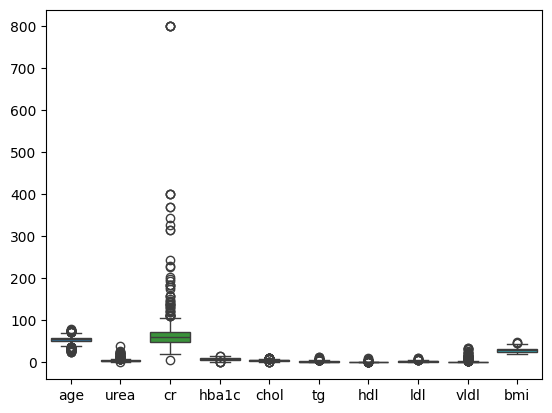

In [436]:
### Check for outliers
sns.boxplot(df1.iloc[:,1:])


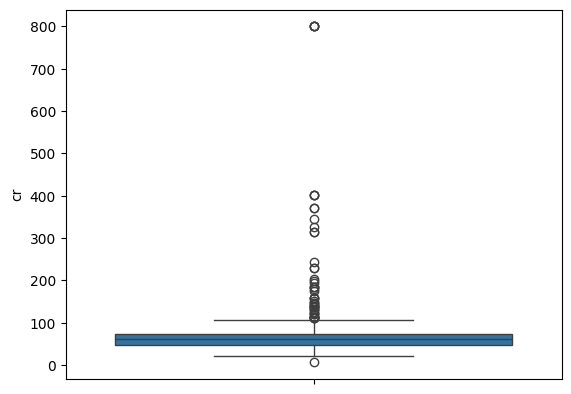

In [437]:
sns.boxplot(df1,y='cr');

In [438]:
#Remove outlier using maximum quantile
max_cr = df1['cr'].quantile(.995)
max_cr

401.0

In [439]:
#Check the outliers
df1[df1['cr'] >max_cr]

,patient_no,gender,age,urea,cr,hba1c,chol,tg,hdl,ldl,vldl,bmi,class
273,34325,M,58.00,20.80,800.00,9.10,6.60,2.90,1.10,4.30,1.30,33.00,Y
283,24060,M,58.00,20.80,800.00,9.10,6.60,2.90,1.10,4.30,1.30,33.00,Y
846,34325,M,56.00,20.80,800.00,9.00,4.60,2.00,1.20,2.50,0.90,35.00,Y
860,51623,M,60.00,20.80,800.00,9.00,2.30,1.10,0.90,0.90,0.50,33.00,Y


In [440]:
#also use .loc
df1.loc[df1['cr']> max_cr]

,patient_no,gender,age,urea,cr,hba1c,chol,tg,hdl,ldl,vldl,bmi,class
273,34325,M,58.00,20.80,800.00,9.10,6.60,2.90,1.10,4.30,1.30,33.00,Y
283,24060,M,58.00,20.80,800.00,9.10,6.60,2.90,1.10,4.30,1.30,33.00,Y
846,34325,M,56.00,20.80,800.00,9.00,4.60,2.00,1.20,2.50,0.90,35.00,Y
860,51623,M,60.00,20.80,800.00,9.00,2.30,1.10,0.90,0.90,0.50,33.00,Y


In [441]:
#use query
df1.query('cr > @max_cr')

,patient_no,gender,age,urea,cr,hba1c,chol,tg,hdl,ldl,vldl,bmi,class
273,34325,M,58.00,20.80,800.00,9.10,6.60,2.90,1.10,4.30,1.30,33.00,Y
283,24060,M,58.00,20.80,800.00,9.10,6.60,2.90,1.10,4.30,1.30,33.00,Y
846,34325,M,56.00,20.80,800.00,9.00,4.60,2.00,1.20,2.50,0.90,35.00,Y
860,51623,M,60.00,20.80,800.00,9.00,2.30,1.10,0.90,0.90,0.50,33.00,Y


In [442]:
#remove the outlier
df1[df1['cr'] <=max_cr]

,patient_no,gender,age,urea,cr,hba1c,chol,tg,hdl,ldl,vldl,bmi,class
0,17975,F,50.00,4.70,46.00,4.90,4.20,0.90,2.40,1.40,0.50,24.00,N
1,34221,M,26.00,4.50,62.00,4.90,3.70,1.40,1.10,2.10,0.60,23.00,N
2,47975,F,50.00,4.70,46.00,4.90,4.20,0.90,2.40,1.40,0.50,24.00,N
3,87656,F,50.00,4.70,46.00,4.90,4.20,0.90,2.40,1.40,0.50,24.00,N
4,34223,M,33.00,7.10,46.00,4.90,4.90,1.00,0.80,2.00,0.40,21.00,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,87654,M,30.00,7.10,81.00,6.70,4.10,1.10,1.20,2.40,8.10,27.40,Y
998,24004,M,38.00,5.80,59.00,6.70,5.30,2.00,1.60,2.90,14.00,40.50,Y
1000,454316,M,64.00,8.80,106.00,8.50,5.90,2.10,1.20,4.00,1.20,32.00,Y
1005,454316,M,55.00,4.80,88.00,8.00,5.70,4.00,0.90,3.30,1.80,30.00,Y


In [443]:
df1[~(df1['cr']  > max_cr)]

,patient_no,gender,age,urea,cr,hba1c,chol,tg,hdl,ldl,vldl,bmi,class
0,17975,F,50.00,4.70,46.00,4.90,4.20,0.90,2.40,1.40,0.50,24.00,N
1,34221,M,26.00,4.50,62.00,4.90,3.70,1.40,1.10,2.10,0.60,23.00,N
2,47975,F,50.00,4.70,46.00,4.90,4.20,0.90,2.40,1.40,0.50,24.00,N
3,87656,F,50.00,4.70,46.00,4.90,4.20,0.90,2.40,1.40,0.50,24.00,N
4,34223,M,33.00,7.10,46.00,4.90,4.90,1.00,0.80,2.00,0.40,21.00,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,87654,M,30.00,7.10,81.00,6.70,4.10,1.10,1.20,2.40,8.10,27.40,Y
998,24004,M,38.00,5.80,59.00,6.70,5.30,2.00,1.60,2.90,14.00,40.50,Y
1000,454316,M,64.00,8.80,106.00,8.50,5.90,2.10,1.20,4.00,1.20,32.00,Y
1005,454316,M,55.00,4.80,88.00,8.00,5.70,4.00,0.90,3.30,1.80,30.00,Y


In [444]:
df2=df1.copy()

In [449]:
df2

,patient_no,gender,age,urea,cr,hba1c,chol,tg,hdl,ldl,vldl,bmi,class
0,17975,F,50.00,4.70,46.00,4.90,4.20,0.90,2.40,1.40,0.50,24.00,N
1,34221,M,26.00,4.50,62.00,4.90,3.70,1.40,1.10,2.10,0.60,23.00,N
2,47975,F,50.00,4.70,46.00,4.90,4.20,0.90,2.40,1.40,0.50,24.00,N
3,87656,F,50.00,4.70,46.00,4.90,4.20,0.90,2.40,1.40,0.50,24.00,N
4,34223,M,33.00,7.10,46.00,4.90,4.90,1.00,0.80,2.00,0.40,21.00,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,87654,M,30.00,7.10,81.00,6.70,4.10,1.10,1.20,2.40,8.10,27.40,Y
998,24004,M,38.00,5.80,59.00,6.70,5.30,2.00,1.60,2.90,14.00,40.50,Y
1000,454316,M,64.00,8.80,106.00,8.50,5.90,2.10,1.20,4.00,1.20,32.00,Y
1005,454316,M,55.00,4.80,88.00,8.00,5.70,4.00,0.90,3.30,1.80,30.00,Y


In [450]:
df1 = df1.query('~(cr > @max_cr)')

In [446]:
df1.query('cr == 401')

,patient_no,gender,age,urea,cr,hba1c,chol,tg,hdl,ldl,vldl,bmi,class
589,7747,F,61.00,24.00,401.00,7.00,4.30,2.90,0.40,2.70,1.30,30.00,Y
590,34455,F,55.00,24.00,401.00,6.30,4.30,2.90,0.40,2.70,1.30,28.00,Y
592,2570,F,61.00,24.00,401.00,7.00,4.30,2.90,0.40,2.70,1.30,36.60,Y


<Axes: ylabel='cr'>

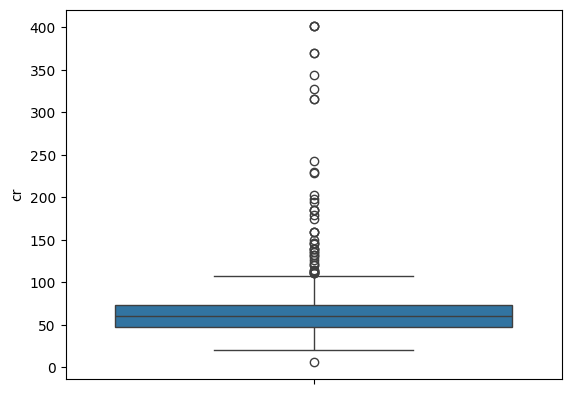

In [451]:
#confirm outlier removal
sns.boxplot(df1,y='cr') #outlier removed

In [455]:
### remove oulier using   iqr
#calculate IQR
q1 = df2['cr'].quantile(0.25)
print(q1)
q3 = df2['cr'].quantile(0.75)
print(q3)
iqr =  q3-q1
iqr

48.0
73.0


25.0

In [456]:
#define lower and upper bounds for outliers
lower_bound = q1 - 1.5 *iqr
print(lower_bound)
upper_bound = q3 + 1.5 * iqr
upper_bound


10.5


110.5

In [457]:
# Filter the data to remove outliers
df2[(df2['cr'] >= lower_bound) & (df2['cr'] <= upper_bound)]

,patient_no,gender,age,urea,cr,hba1c,chol,tg,hdl,ldl,vldl,bmi,class
0,17975,F,50.00,4.70,46.00,4.90,4.20,0.90,2.40,1.40,0.50,24.00,N
1,34221,M,26.00,4.50,62.00,4.90,3.70,1.40,1.10,2.10,0.60,23.00,N
2,47975,F,50.00,4.70,46.00,4.90,4.20,0.90,2.40,1.40,0.50,24.00,N
3,87656,F,50.00,4.70,46.00,4.90,4.20,0.90,2.40,1.40,0.50,24.00,N
4,34223,M,33.00,7.10,46.00,4.90,4.90,1.00,0.80,2.00,0.40,21.00,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,87654,M,30.00,7.10,81.00,6.70,4.10,1.10,1.20,2.40,8.10,27.40,Y
998,24004,M,38.00,5.80,59.00,6.70,5.30,2.00,1.60,2.90,14.00,40.50,Y
1000,454316,M,64.00,8.80,106.00,8.50,5.90,2.10,1.20,4.00,1.20,32.00,Y
1005,454316,M,55.00,4.80,88.00,8.00,5.70,4.00,0.90,3.30,1.80,30.00,Y


In [463]:
df2 = df2.query('cr >= @lower_bound & cr <=@upper_bound')
df2

,patient_no,gender,age,urea,cr,hba1c,chol,tg,hdl,ldl,vldl,bmi,class
0,17975,F,50.00,4.70,46.00,4.90,4.20,0.90,2.40,1.40,0.50,24.00,N
1,34221,M,26.00,4.50,62.00,4.90,3.70,1.40,1.10,2.10,0.60,23.00,N
2,47975,F,50.00,4.70,46.00,4.90,4.20,0.90,2.40,1.40,0.50,24.00,N
3,87656,F,50.00,4.70,46.00,4.90,4.20,0.90,2.40,1.40,0.50,24.00,N
4,34223,M,33.00,7.10,46.00,4.90,4.90,1.00,0.80,2.00,0.40,21.00,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,87654,M,30.00,7.10,81.00,6.70,4.10,1.10,1.20,2.40,8.10,27.40,Y
998,24004,M,38.00,5.80,59.00,6.70,5.30,2.00,1.60,2.90,14.00,40.50,Y
1000,454316,M,64.00,8.80,106.00,8.50,5.90,2.10,1.20,4.00,1.20,32.00,Y
1005,454316,M,55.00,4.80,88.00,8.00,5.70,4.00,0.90,3.30,1.80,30.00,Y


<Axes: ylabel='cr'>

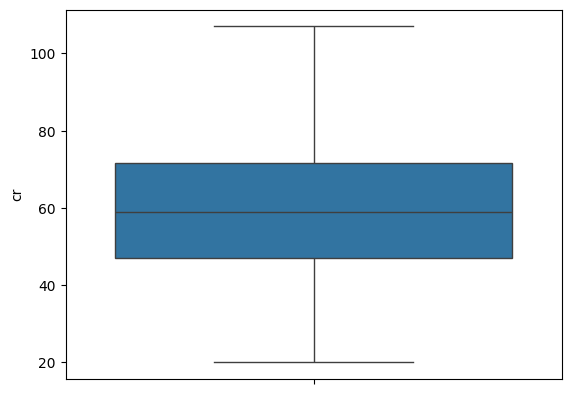

In [464]:
#check boxplot again
sns.boxplot(df2, y='cr')

### 2.5 Changing data types

In [ ]:
#Changing the data type, we use df['col name] = df['col_name].astype('int')# int for numerical column and category or object for categorical column
#data['gender'] = data['gender'].astype('category')

### 2.6 saving the clean dataset


In [465]:
df2.to_csv('clean_diabetes.csv')

In [468]:
df2.to_csv('clean_diabetes.csv',index=False)

### EXPLORATORY DATA ANALYSIS(EDA)
Analyze and investigate data sets to summarize their main characteristics
#### Goals:
1)Undestanding the data- Getting a sense of the data's distribution, range and central tendencies.

2)Identifying patterns: Discovering trends,correlations, or anomalises within the data.

3)Checking assumptions: Verifying assumptions made about the data before further analysis or modeling.
Generating hypotheses: Developing potential explanations or questions based on the findings.

#### Common techniques used in EDA:

- Visualization: Creating plots, charts, and graphs to visually represent the data and make patterns easier to spot.
- Summary statistics: Calculating measures like mean, median, mode, standard deviation, and quartiles to summarize the data numerically.
- Data cleaning: Identifying and handling missing values, outliers, or inconsistencies in the data.
- Feature engineering: Creating new features or transforming existing ones to improve the data's quality or relevance for analysis.

Benefits of EDA:

* Improved understanding: It helps you gain a deeper understanding of the data and its underlying structure.
* Better decision-making: It provides insights that can inform your data analysis and modeling choices.
* Enhanced model performance: A well-conducted EDA can lead to more accurate and reliable models.
* Hypothesis generation: It can spark new ideas and research directions.

By effectively exploring and understanding your data through EDA, you can lay a strong foundation for further analysis and draw meaningful conclusions.

### 1. Univariate analysis
Univariate analysis is a statistical technique used to describe and summarize the distribution of a single variable. It is often used as a preliminary step in data analysis to identify patterns, trends, and outliers.

There are a number of different univariate analysis techniques, including:
* **Frequency distribution(count plot):** This shows the number of times each unique value occurs in a variable.
* **Histogram:** This is a graphical representation of the frequency distribution.
* **Boxplot:** This shows the median, quartiles, and outliers of a variable.
* **Stem-and-leaf plot:** This is a graphical representation of the data that shows the individual values and their distribution.

Univariate analysis can be used to answer a variety of questions about a variable, such as:

* What is the most common value?
* What is the average value?
* What is the range of values?
* Are there any outliers?
* Is the distribution skewed?

Univariate analysis can be performed using a variety of statistical software packages, such as R, Python, and SAS.

Here is an example of how to perform univariate analysis on a variable in Python:

In [469]:
!ls

 clean_diabetes.csv   diabetes.csv   sample_data  'Sample Superstore.xlsx'   test.csv


In [470]:
data =  pd.read_csv('clean_diabetes.csv')
data

,patient_no,gender,age,urea,cr,hba1c,chol,tg,hdl,ldl,vldl,bmi,class
0,17975,F,50.00,4.70,46.00,4.90,4.20,0.90,2.40,1.40,0.50,24.00,N
1,34221,M,26.00,4.50,62.00,4.90,3.70,1.40,1.10,2.10,0.60,23.00,N
2,47975,F,50.00,4.70,46.00,4.90,4.20,0.90,2.40,1.40,0.50,24.00,N
3,87656,F,50.00,4.70,46.00,4.90,4.20,0.90,2.40,1.40,0.50,24.00,N
4,34223,M,33.00,7.10,46.00,4.90,4.90,1.00,0.80,2.00,0.40,21.00,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,87654,M,30.00,7.10,81.00,6.70,4.10,1.10,1.20,2.40,8.10,27.40,Y
939,24004,M,38.00,5.80,59.00,6.70,5.30,2.00,1.60,2.90,14.00,40.50,Y
940,454316,M,64.00,8.80,106.00,8.50,5.90,2.10,1.20,4.00,1.20,32.00,Y
941,454316,M,55.00,4.80,88.00,8.00,5.70,4.00,0.90,3.30,1.80,30.00,Y


In [472]:
#check for missing values
data.isna().sum().any()

False

In [473]:
diabetes =  data.copy()
diabetes

,patient_no,gender,age,urea,cr,hba1c,chol,tg,hdl,ldl,vldl,bmi,class
0,17975,F,50.00,4.70,46.00,4.90,4.20,0.90,2.40,1.40,0.50,24.00,N
1,34221,M,26.00,4.50,62.00,4.90,3.70,1.40,1.10,2.10,0.60,23.00,N
2,47975,F,50.00,4.70,46.00,4.90,4.20,0.90,2.40,1.40,0.50,24.00,N
3,87656,F,50.00,4.70,46.00,4.90,4.20,0.90,2.40,1.40,0.50,24.00,N
4,34223,M,33.00,7.10,46.00,4.90,4.90,1.00,0.80,2.00,0.40,21.00,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,87654,M,30.00,7.10,81.00,6.70,4.10,1.10,1.20,2.40,8.10,27.40,Y
939,24004,M,38.00,5.80,59.00,6.70,5.30,2.00,1.60,2.90,14.00,40.50,Y
940,454316,M,64.00,8.80,106.00,8.50,5.90,2.10,1.20,4.00,1.20,32.00,Y
941,454316,M,55.00,4.80,88.00,8.00,5.70,4.00,0.90,3.30,1.80,30.00,Y


### a)Count Plot
Type of bar chart that shows the number of times each unique value occurs in a variable.it is oftern used to visualize the distribution of categorical variables

#### i)Checking the gender variable

<Axes: xlabel='gender'>

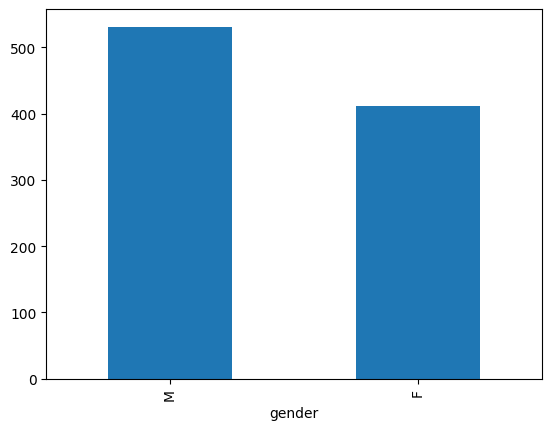

In [475]:
diabetes.gender.value_counts().plot(kind='bar')

<Axes: xlabel='gender'>

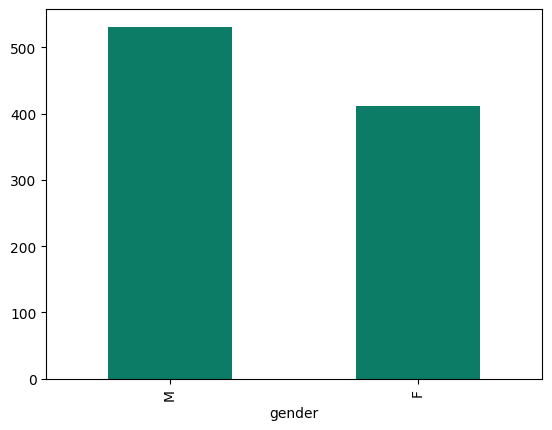

In [476]:
diabetes.gender.value_counts().plot(kind='bar',color='#0D7C66')

<Axes: xlabel='gender'>

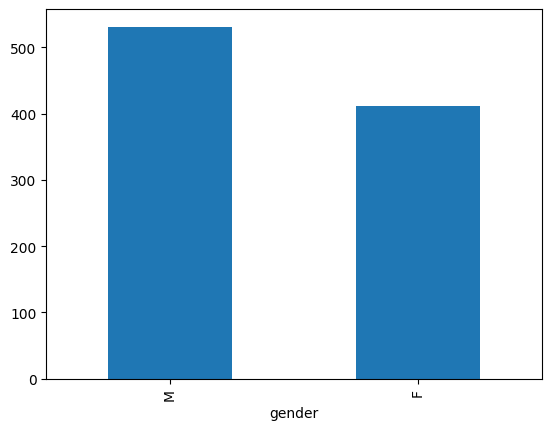

In [479]:
gender_counts = diabetes.gender.value_counts()
gender_counts.plot(kind='bar')

<Axes: xlabel='gender', ylabel='count'>

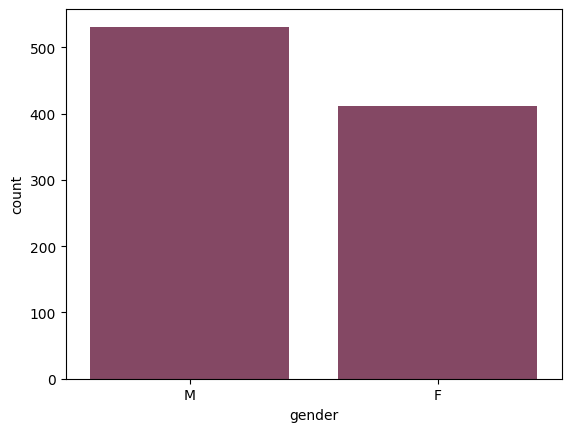

In [498]:
#using seaborn
sns.countplot(diabetes, x='gender',order=gender_counts.index)
#sns.countplot(x=data['gender'], order=gender_counts.index, color='#8E3E63')

<BarContainer object of 2 artists>

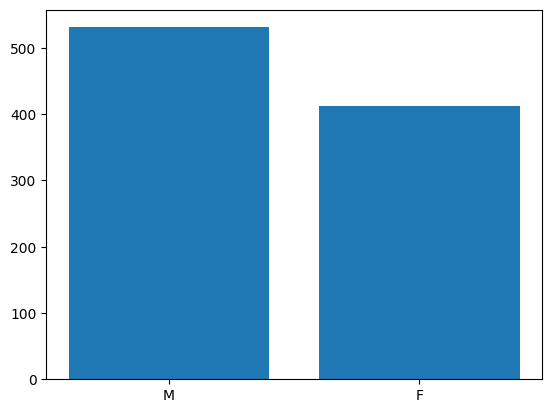

In [489]:
#barplot
#using matplotlib
plt.bar(gender_counts.index,gender_counts.values)

<Axes: xlabel='gender'>

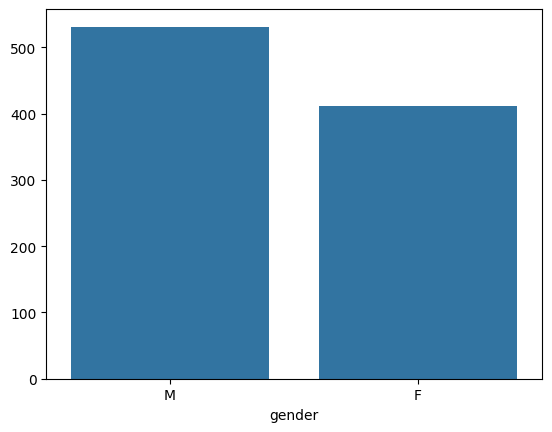

In [499]:
##barplot
#using seaborns
sns.barplot(x=gender_counts.index,y=gender_counts.values)

In [493]:
gender_counts.values

array([531, 412])

### <font color='red'>Observation: Males are more</font>

#### ii)check the age variable

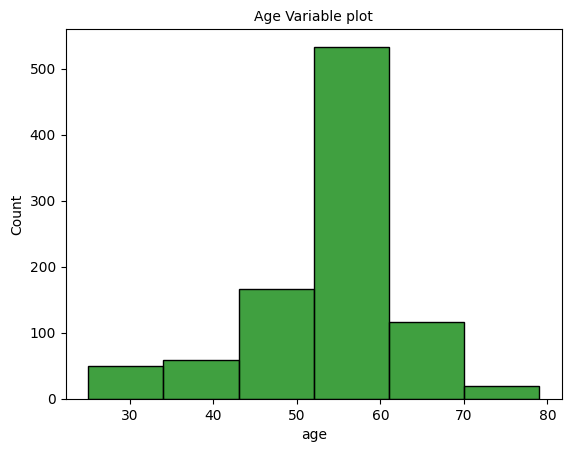

In [509]:
sns.histplot(diabetes['age'],bins=6,color='g')
plt.title('Age Variable plot', fontsize=10);

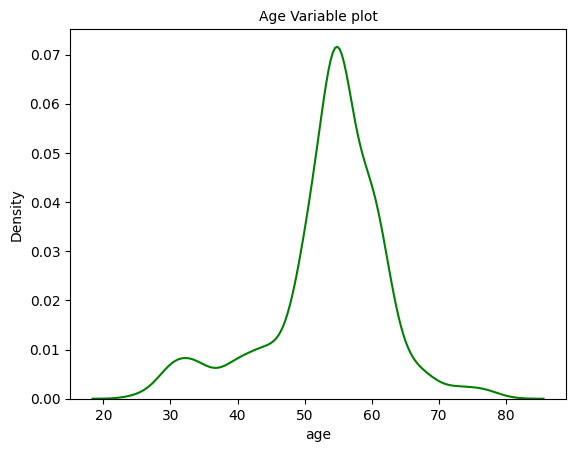

In [510]:
sns.kdeplot(diabetes['age'],color='g')
plt.title('Age Variable plot', fontsize=10);

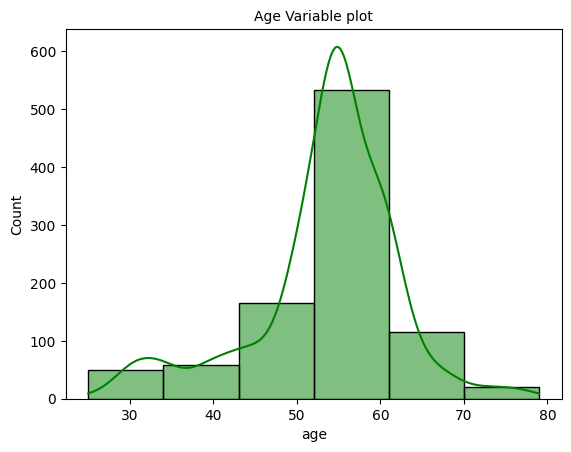

In [511]:
# combine the two
sns.histplot(diabetes['age'],color='g',bins=6,kde=True)
plt.title('Age Variable plot', fontsize=10);

In [523]:
diabetes['age'].skew()

-0.8158667725750883

### <font color='red'>Observation: Age between 50 and 60</font>
Interpretation

If data are **positively skewed**, we can expect more of the values from a data set to be from the lower values of the data set.
If data are normally distributed, with no skew, we can expect more of the values from a data set to be from the centre values of the data set.
If data are **negatively skewed**, we can expect more of the values from a data set to be from the higher values of the data set.
The value given by the SKEW() function will te

#### iii)Check urea variable

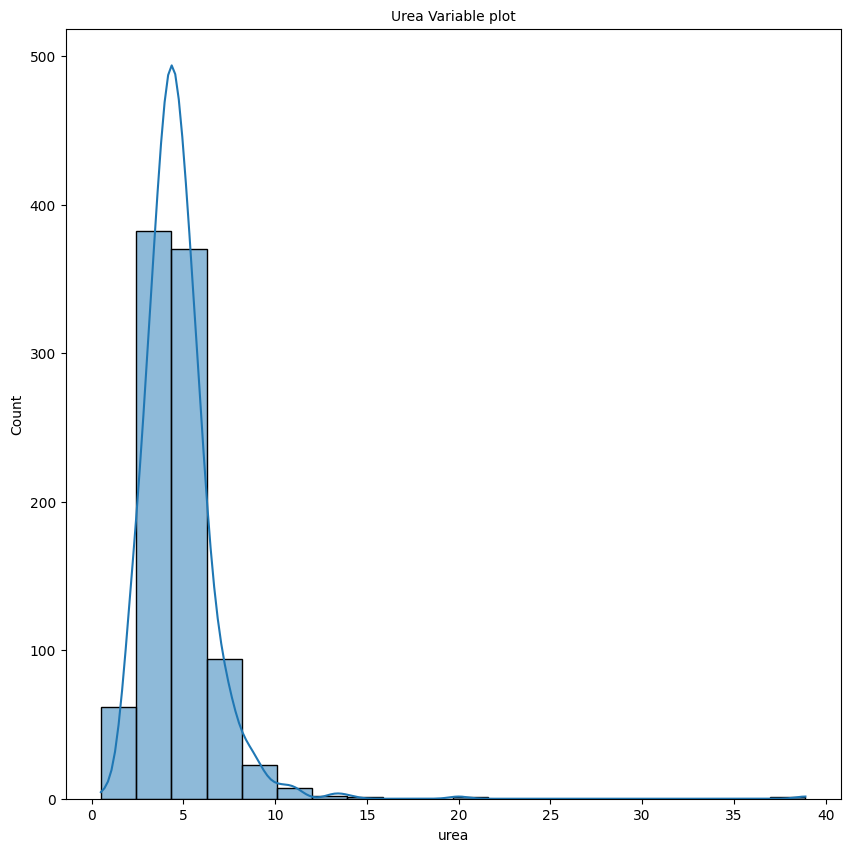

In [524]:
plt.figure(figsize=(10,10))
sns.histplot(diabetes['urea'],bins=20,kde=True)
plt.title('Urea Variable plot', fontsize=10);

In [525]:
diabetes['urea'].skew()

5.856406539153679

#### iii)Check the class variable

<Axes: xlabel='class', ylabel='count'>

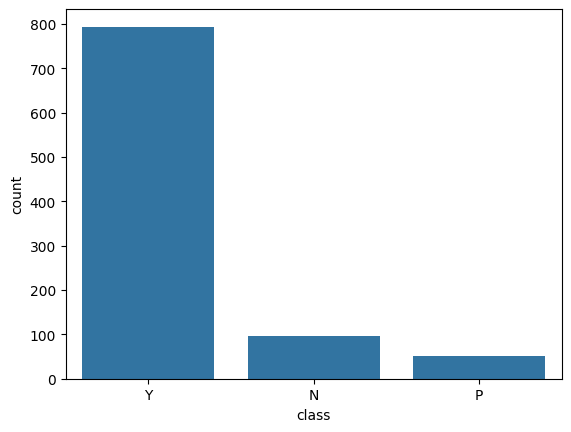

In [522]:
class_value =diabetes['class'].value_counts().index
sns.countplot(x=diabetes['class'],order=class_value)

In [531]:
###use pie chart
diabetes_count = diabetes['class'].value_counts()
diabetes_count

,count
class,
Y,794
N,97
P,52


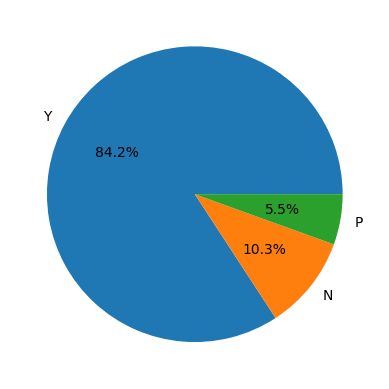

In [536]:
plt.pie(diabetes_count,labels=diabetes_count.index,autopct='%1.1f%%');
#plt.pie(diabetis_count, labels=diabetis_count.index, autopct='%1.1f%%', startangle=90, explode=[0.1,0.0,0.0])

### <font color='red'> observation: Y class is more</font>

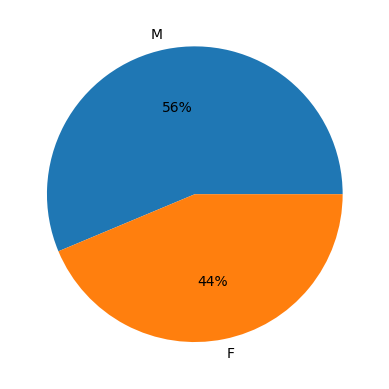

In [540]:
plt.pie(gender_counts,labels=gender_counts.index,autopct='%1.0f%%');

### summary statistics

In [544]:
diabetes.mean(numeric_only=True)

,0
patient_no,284192.66
age,53.52
urea,4.72
cr,59.67
hba1c,8.29
chol,4.87
tg,2.33
hdl,1.21
ldl,2.61
vldl,1.89


In [545]:
diabetes.columns

Index(['patient_no', 'gender', 'age', 'urea', 'cr', 'hba1c', 'chol', 'tg',
       'hdl', 'ldl', 'vldl', 'bmi', 'class'],
      dtype='object')

In [554]:
df_num =  diabetes.select_dtypes(['int','float']) # diabetes.select_dtypes([int,float])
df_num

,patient_no,age,urea,cr,hba1c,chol,tg,hdl,ldl,vldl,bmi
0,17975,50.00,4.70,46.00,4.90,4.20,0.90,2.40,1.40,0.50,24.00
1,34221,26.00,4.50,62.00,4.90,3.70,1.40,1.10,2.10,0.60,23.00
2,47975,50.00,4.70,46.00,4.90,4.20,0.90,2.40,1.40,0.50,24.00
3,87656,50.00,4.70,46.00,4.90,4.20,0.90,2.40,1.40,0.50,24.00
4,34223,33.00,7.10,46.00,4.90,4.90,1.00,0.80,2.00,0.40,21.00
...,...,...,...,...,...,...,...,...,...,...,...
938,87654,30.00,7.10,81.00,6.70,4.10,1.10,1.20,2.40,8.10,27.40
939,24004,38.00,5.80,59.00,6.70,5.30,2.00,1.60,2.90,14.00,40.50
940,454316,64.00,8.80,106.00,8.50,5.90,2.10,1.20,4.00,1.20,32.00
941,454316,55.00,4.80,88.00,8.00,5.70,4.00,0.90,3.30,1.80,30.00


In [559]:
df_num.agg(['mean','median','skew','kurtosis'])

,patient_no,age,urea,cr,hba1c,chol,tg,hdl,ldl,vldl,bmi
mean,284192.66,53.52,4.72,59.67,8.29,4.87,2.33,1.21,2.61,1.89,29.55
median,34387.00,55.00,4.50,59.00,8.00,4.80,2.00,1.10,2.50,0.90,30.00
skew,18.99,-0.82,5.86,0.30,0.22,0.64,2.35,6.34,1.18,5.21,0.16
kurtosis,377.78,1.40,83.83,-0.23,-0.29,1.89,10.99,62.35,4.32,31.59,-0.25


### 2. Bivariate Analysis
Bivariate analysis is a statistical technique used to describe and summarize the relationship between two variables. It is often used as a preliminary step in data analysis to identify patterns, trends, and correlations.

There are a number of different bivariate analysis techniques, including:

* **Scatter plot:** This is a graphical representation of the relationship between two variables.
* **Correlation coefficient:** This is a numerical measure of the strength and direction of the relationship between two variables.
* **Regression analysis:** This is a statistical technique used to predict the value of one variable based on the value of another variable.

Bivariate analysis can be used to answer a variety of questions about the relationship between two variables, such as:

* Is there a relationship between the two variables?
* What is the strength and direction of the relationship?
* Can one variable be used to predict the other variable?

####a))) Bar plot

Bar plots are used to compare the values of different categories. They are often used to visualize the distribution of categorical variables, or to compare the means of different groups.

Here are some examples of when you might use a bar plot:

* To compare the number of patients in each gender category.
* To compare the mean blood pressure of patients with and without diabetes.
* To compare the mean age of patients in different age groups.

Bar plots are a simple and effective way to visualize categorical data. They are easy to create and interpret, and they can be used to communicate complex information quickly and clearly.

In [564]:
#compare gender and class
gender_class = pd.crosstab(diabetes['gender'],diabetes['class'])
print(gender_class)

class    N   P    Y
gender             
F       60  17  335
M       37  35  459


<Axes: xlabel='gender'>

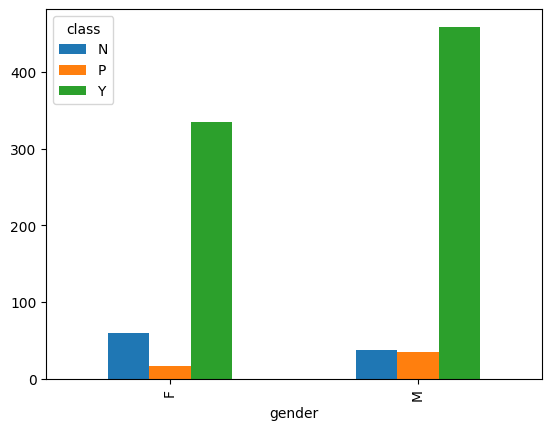

In [565]:
gender_class.plot(kind='bar')

<Axes: xlabel='gender', ylabel='count'>

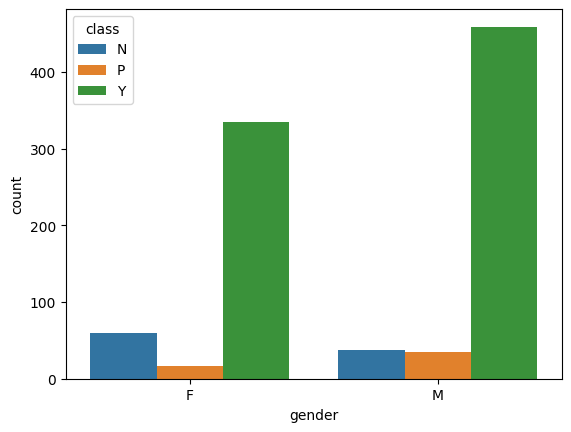

In [566]:
## use countplot and add hue
sns.countplot(diabetes, x='gender',hue='class')
#sns.countplot(x=diabetes['gender'], order=gender_counts.index, color='#8E3E63')

### <font color='red'>observation:</font>

<Axes: xlabel='class', ylabel='age'>

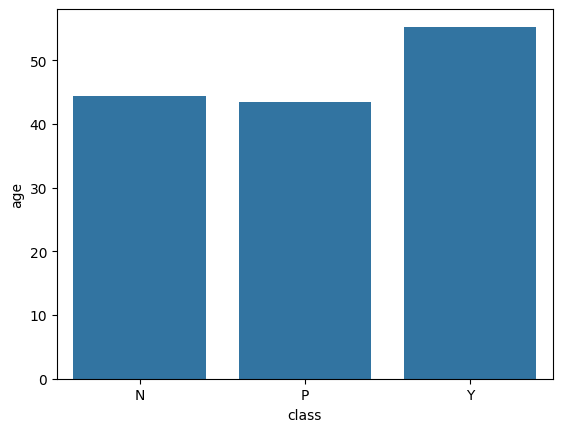

In [575]:
##age vs class(numeric and categorical)#barchart
sns.barplot(data=diabetes, y='age',x='class',errorbar=None)


<Axes: xlabel='class'>

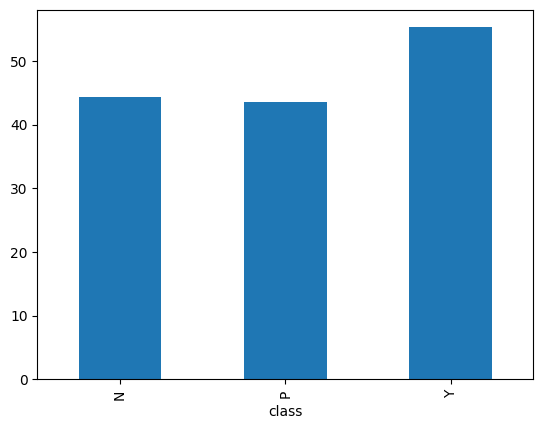

In [582]:
###matplotlib
diabetes.groupby('class')['age'].mean().plot(kind='bar')

<Axes: ylabel='age'>

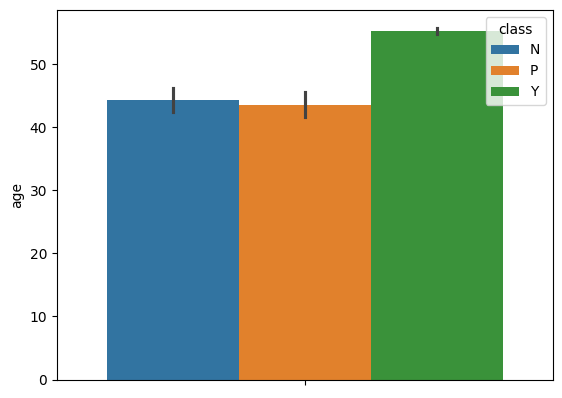

In [583]:
sns.barplot(y=diabetes['age'], hue = diabetes['class'] );


### <font color='red'>observation:</font>

<Axes: xlabel='age', ylabel='cr'>

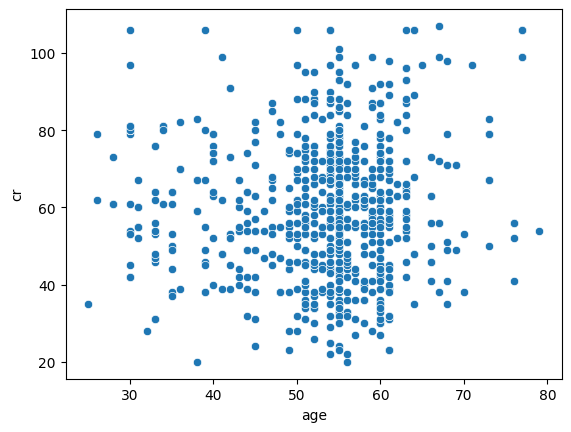

In [584]:
### age vs cr (continous var) scatterplot
sns.scatterplot(data=diabetes,x='age',y='cr')

In [585]:
np.corrcoef(diabetes['age'],diabetes['cr'])[0][1]

0.057700634886981884

<Axes: xlabel='urea', ylabel='cr'>

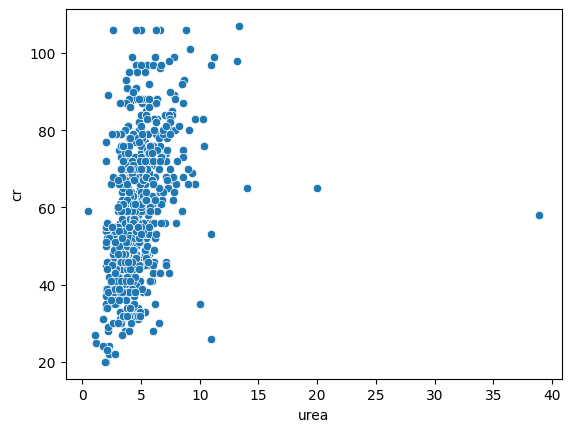

In [588]:
### urea and cr
sns.scatterplot(data=diabetes,x='urea',y='cr')

In [589]:
np.corrcoef(diabetes['urea'],diabetes['cr'])[0][1]

0.39380331568274707

<Axes: xlabel='ldl', ylabel='age'>

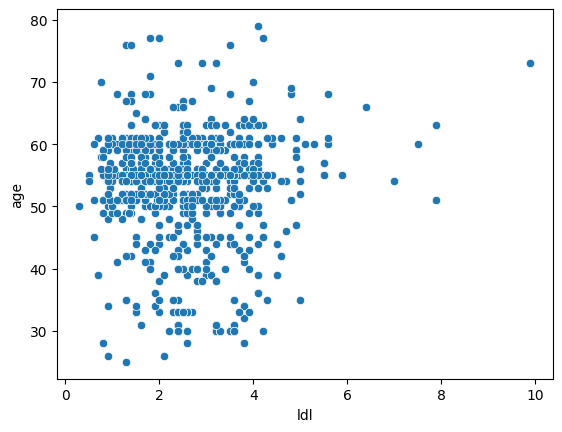

In [590]:
### ldl and age
sns.scatterplot(data=diabetes,x='ldl',y='age')

In [591]:
np.corrcoef(diabetes['ldl'],diabetes['age'])[0][1]

0.017925105000133855

In [592]:
#do all at once ##subset numerical columns
diabetes.select_dtypes(['int','float'])

,patient_no,age,urea,cr,hba1c,chol,tg,hdl,ldl,vldl,bmi
0,17975,50.00,4.70,46.00,4.90,4.20,0.90,2.40,1.40,0.50,24.00
1,34221,26.00,4.50,62.00,4.90,3.70,1.40,1.10,2.10,0.60,23.00
2,47975,50.00,4.70,46.00,4.90,4.20,0.90,2.40,1.40,0.50,24.00
3,87656,50.00,4.70,46.00,4.90,4.20,0.90,2.40,1.40,0.50,24.00
4,34223,33.00,7.10,46.00,4.90,4.90,1.00,0.80,2.00,0.40,21.00
...,...,...,...,...,...,...,...,...,...,...,...
938,87654,30.00,7.10,81.00,6.70,4.10,1.10,1.20,2.40,8.10,27.40
939,24004,38.00,5.80,59.00,6.70,5.30,2.00,1.60,2.90,14.00,40.50
940,454316,64.00,8.80,106.00,8.50,5.90,2.10,1.20,4.00,1.20,32.00
941,454316,55.00,4.80,88.00,8.00,5.70,4.00,0.90,3.30,1.80,30.00


In [594]:

diabetes.select_dtypes(['int','float']).columns

Index(['patient_no', 'age', 'urea', 'cr', 'hba1c', 'chol', 'tg', 'hdl', 'ldl',
       'vldl', 'bmi'],
      dtype='object')

In [597]:
data_int = diabetes[['age', 'urea', 'cr', 'hba1c', 'chol', 'tg', 'hdl', 'ldl',
       'vldl', 'bmi']]
data_int

,age,urea,cr,hba1c,chol,tg,hdl,ldl,vldl,bmi
0,50.00,4.70,46.00,4.90,4.20,0.90,2.40,1.40,0.50,24.00
1,26.00,4.50,62.00,4.90,3.70,1.40,1.10,2.10,0.60,23.00
2,50.00,4.70,46.00,4.90,4.20,0.90,2.40,1.40,0.50,24.00
3,50.00,4.70,46.00,4.90,4.20,0.90,2.40,1.40,0.50,24.00
4,33.00,7.10,46.00,4.90,4.90,1.00,0.80,2.00,0.40,21.00
...,...,...,...,...,...,...,...,...,...,...
938,30.00,7.10,81.00,6.70,4.10,1.10,1.20,2.40,8.10,27.40
939,38.00,5.80,59.00,6.70,5.30,2.00,1.60,2.90,14.00,40.50
940,64.00,8.80,106.00,8.50,5.90,2.10,1.20,4.00,1.20,32.00
941,55.00,4.80,88.00,8.00,5.70,4.00,0.90,3.30,1.80,30.00


In [598]:
corr = data_int.corr()
corr

,age,urea,cr,hba1c,chol,tg,hdl,ldl,vldl,bmi
age,1.00,0.11,0.06,0.39,0.04,0.15,-0.01,0.02,-0.09,0.36
urea,0.11,1.00,0.39,-0.02,0.02,0.02,-0.01,-0.00,0.02,0.04
cr,0.06,0.39,1.00,-0.13,-0.02,0.02,-0.03,0.08,0.12,-0.01
hba1c,0.39,-0.02,-0.13,1.00,0.17,0.23,0.03,0.01,0.07,0.41
chol,0.04,0.02,-0.02,0.17,1.00,0.33,0.10,0.43,0.07,0.02
tg,0.15,0.02,0.02,0.23,0.33,1.00,-0.09,0.00,0.15,0.10
hdl,-0.01,-0.01,-0.03,0.03,0.10,-0.09,1.00,-0.15,-0.06,0.08
ldl,0.02,-0.00,0.08,0.01,0.43,0.00,-0.15,1.00,0.06,-0.06
vldl,-0.09,0.02,0.12,0.07,0.07,0.15,-0.06,0.06,1.00,0.20
bmi,0.36,0.04,-0.01,0.41,0.02,0.10,0.08,-0.06,0.20,1.00


In [599]:
print(plt.colormaps())

['magma', 'inferno', 'plasma', 'viridis', 'cividis', 'twilight', 'twilight_shifted', 'turbo', 'Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c', 'magma_r', 'inferno_r', 'plasma_r', 'viridis_r', 'cividis_r', 'twilight_r', 'twilight_shifted_r', 'turbo_r', 'Blues_r', 'BrBG_r', 'BuGn_r', 'BuPu_r', 'CMRmap_r', 'GnBu_r', 'G

<Axes: >

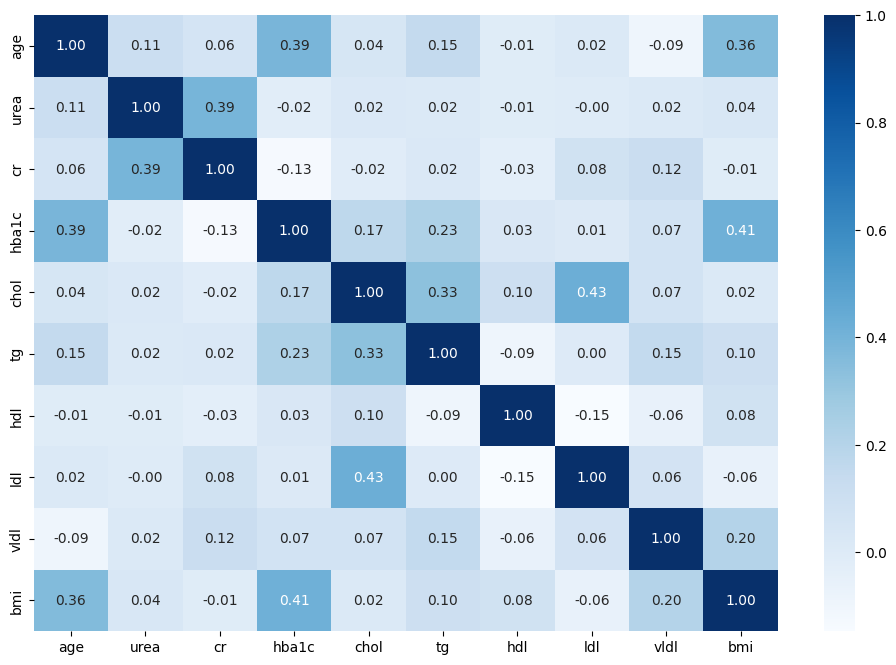

In [612]:
plt.figure(figsize=(12,8))
sns.heatmap(corr,annot=True,fmt='.2f',cmap='Blues')

### 3.Multivariate Analysis
Multivariate analysis is a statistical technique used to describe and summarize the relationship between three or more variables. It is often used as a preliminary step in data analysis to identify patterns, trends, and correlations.

There are a number of different multivariate analysis techniques, including:

* **Multiple regression analysis:** This is a statistical technique used to predict the value of one variable based on the values of two or more other variables.
* **Factor analysis:** This is a statistical technique used to reduce the number of variables in a dataset by identifying groups of variables that are correlated.
* **Cluster analysis:** This is a statistical technique used to group observations into clusters based on their similarity.
* **Discriminant analysis:** This is a statistical technique used to classify observations into two or more groups based on their characteristics.

Multivariate analysis can be used to answer a variety of questions about the relationship between three or more variables, such as:

* What are the most important factors that influence a particular outcome?
* How can we group observations into clusters based on their similarity?
* How can we classify observations into two or more groups based on their characteristics?

Multivariate analysis is a powerful tool that can be used to gain insights into the relationships between multiple variables. It is often used in a variety of fields, such as marketing, finance, and healthcare.

<Axes: xlabel='urea', ylabel='cr'>

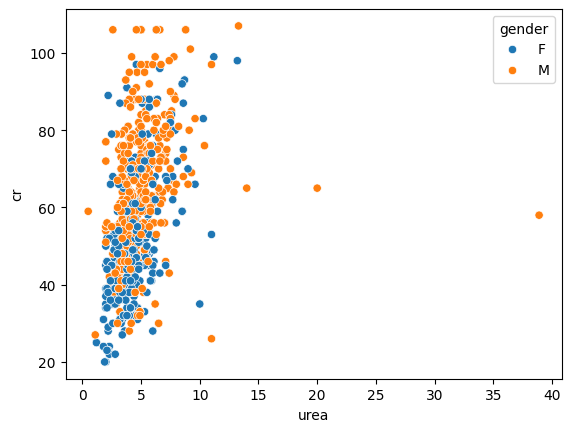

In [613]:
#urea,cr,gender
sns.scatterplot(data=diabetes,x='urea',y='cr',hue='gender')

### <font color='red'>observation: condition common in men </font>

<Axes: xlabel='urea', ylabel='cr'>

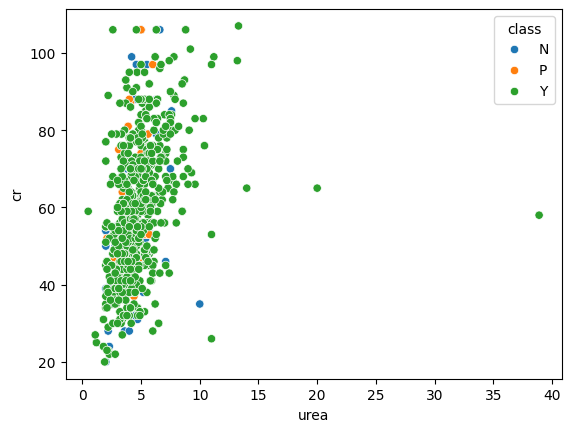

In [614]:
#urea,cr,class
sns.scatterplot(data=diabetes,x='urea',y='cr',hue='class')

### <font color='red'>observation: condition common in y class </font>